<a href="https://colab.research.google.com/github/sujin-create/finedu/blob/main/%EA%B8%88%EC%9C%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EC%9D%84%20%EC%9C%84%ED%95%9C%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%ED%99%9C%EC%9A%A9%EB%B2%95/%EA%B8%88%EC%9C%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EA%B0%95%EC%9D%98_5%EA%B0%95_%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D%EA%B3%BC_%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 상관관계 분석

국내 주식과 미국 주식의 상관관계를 비교해봅시다. 2010년 6월 1일부터 현재까지 KOSPI 지수와 다우존스 지수 데이터를 구해봅시다.

In [6]:
pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1강에서 소개했던 패키지인 파이낸셜데이터 리더를 통해서 다우존스지수와 코스피 지수를 불러옵니다.

링크 : https://github.com/FinanceData/FinanceDataReader

In [7]:
import FinanceDataReader as fdr

파이낸셜데이터 리더는 기본적으로 판다스의 데이터프레임 형태로 데이터를 로드합니다.  
둘 다 2010년 6월 1일 기준으로 데이터를 로드하겠습니다.

In [8]:
dow = fdr.DataReader('DJI', '2010-06-01')
dow.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-06-01,10024.02,10133.94,10218.33,10013.90,221900000.0,-0.0111
2010-06-02,10249.54,10025.61,10254.22,10025.61,200850000.0,0.0225
2010-06-03,10255.28,10250.67,10315.21,10175.02,176870000.0,0.0006
2010-06-04,9931.97,10249.61,10249.69,9889.88,256600000.0,-0.0315
2010-06-07,9816.49,9931.75,9982.38,9810.30,222940000.0,-0.0116


In [9]:
kospi = fdr.DataReader('KS11', '2010-06-01')
kospi.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-06-01,1630.40,1634.55,1643.08,1623.40,314100000.0,-0.0066
2010-06-03,1661.84,1643.74,1663.67,1641.77,308760000.0,0.0193
2010-06-04,1664.13,1660.99,1670.94,1658.52,286090000.0,0.0014
2010-06-07,1637.97,1628.06,1638.88,1618.57,300880000.0,-0.0157
2010-06-08,1651.48,1635.01,1656.37,1630.43,280290000.0,0.0082


In [10]:
kospi.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-07-01,2305.42,2342.92,2354.97,2291.49,530340000.0,-0.0117
2022-07-04,2300.34,2310.73,2318.31,2276.63,467960000.0,-0.0022
2022-07-05,2341.78,2322.11,2344.08,2309.62,323900000.0,0.0180
2022-07-06,2292.01,2330.11,2332.14,2290.33,410730000.0,-0.0213
2022-07-07,2334.27,2308.97,2344.14,2307.90,332970.0,0.0184


In [11]:
kospi.describe()

,Close,Open,High,Low,Volume,Change
count,2987.000000,2987.000000,2987.000000,2987.000000,2.987000e+03,2987.000000
mean,2178.940790,2180.117533,2190.328262,2166.920512,4.944717e+08,0.000173
std,359.418676,359.740700,361.869183,357.377572,2.968954e+08,0.010410
min,1457.640000,1474.450000,1516.750000,1439.430000,1.722300e+05,-0.083900
25%,1958.105000,1960.325000,1966.660000,1949.390000,3.156450e+08,-0.004700
50%,2043.970000,2046.670000,2053.460000,2036.230000,3.972500e+08,0.000400
75%,2308.270000,2312.200000,2320.525000,2296.055000,5.615600e+08,0.005700
max,3305.210000,3305.460000,3316.080000,3295.440000,3.460000e+09,0.086000


In [12]:
kospi.index

DatetimeIndex(['2010-06-01', '2010-06-03', '2010-06-04', '2010-06-07',
               '2010-06-08', '2010-06-09', '2010-06-10', '2010-06-11',
               '2010-06-14', '2010-06-15',
               ...
               '2022-06-24', '2022-06-27', '2022-06-28', '2022-06-29',
               '2022-06-30', '2022-07-01', '2022-07-04', '2022-07-05',
               '2022-07-06', '2022-07-07'],
              dtype='datetime64[ns]', name='Date', length=2987, freq=None)

matplotlib 패키지를 통해서 다우존스 지수와 코스피 지수를 시각화를 해볼게요.  
다우존스 지수는 빨간색으로, 코스피 지수는 파란색으로 시각화를 합니다.  
둘 다 종가 기준으로 시각화를 할거에요.

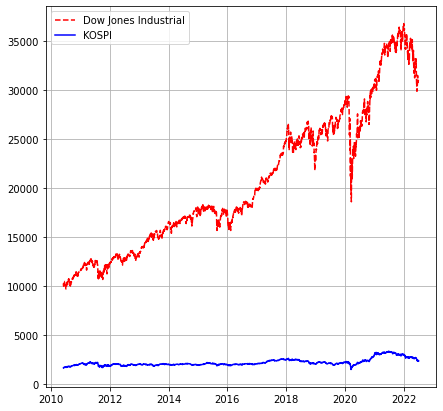

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

이렇게 두 가지 종목의 가격이나, 지수의 가격을 비교할 때  
두 종목의 가격의 크기가 너무 다르면 서로 비교가 어렵습니다.  

이런 경우에는 가격의 절대값 비교가 아닌 변동률 비교를 통해서 둘 다 서로 비슷하게 움직였는지를 판단하면 두 대상의 상관관계를 구하기가 용이합니다.

  이번에는 현재 종가를 특정 시점의 종가로 나누어 변동률을 구해봅시다.

* 오늘의 종가를 특정일의 종가로 나눈 뒤 100을 곱하면, 특정일의 종가 대비 오늘 종가의 변동률을 구할 수 있습니다.  
이렇게 가격이 다른 두 주식 종목의 수익률를 비교하는 방법을 지수화라고 합니다.  

In [14]:
d = (dow.Close / dow.Close.loc['2010-06-01']) * 100
k = (kospi.Close / kospi.Close.loc['2010-06-01']) * 100

다우존스 지수와 코스피 지수 모두 2010년 6월 1일을 기준으로 변동률을 구합니다.

In [15]:
d

Date
2010-06-01    100.000000
2010-06-02    102.249796
2010-06-03    102.307058
2010-06-04     99.081706
2010-06-07     97.929673
                 ...    
2022-06-29    309.535695
2022-06-30    307.059543
2022-07-01    310.229429
2022-07-05    308.932444
2022-07-06    309.628472
Name: Close, Length: 3046, dtype: float64

In [16]:
k

Date
2010-06-01    100.000000
2010-06-03    101.928361
2010-06-04    102.068817
2010-06-07    100.464303
2010-06-08    101.292934
                 ...    
2022-07-01    141.402110
2022-07-04    141.090530
2022-07-05    143.632237
2022-07-06    140.579612
2022-07-07    143.171614
Name: Close, Length: 2987, dtype: float64

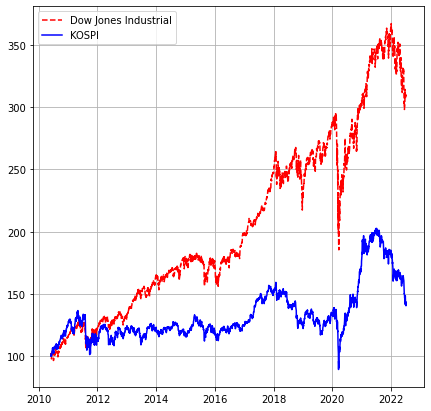

In [17]:
plt.figure(figsize=(7, 7))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

#산점도 분석

다우존스 지수와 KOSPI의 관계를 분석하는데 산점도(scatter plot)을 사용해봅시다. 산점도란 독립변수 x와 종속변수 y의 상관관계를 확인할 때 쓰는 그래프입니다. 가로축은 독립변수 x를, 세로축은 종속변수 y를 나타냅니다. 미국 시장과 국내 시장의 상관관계를 알아보고자 x를 다우존스 지수로 y를 KOSPI 지수로 정했습니다.

In [18]:
print(len(dow))
print(len(kospi))

3046
2987


두 데이터의 개수는 다릅니다. 이 경우 산점도를 그려봅시다.  
산점도는 matplotlib의 scatter를 사용하여 그릴 수 있습니다.

ValueError: ignored

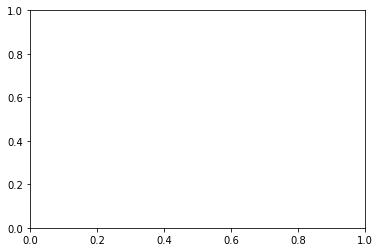

In [19]:
plt.scatter(dow, kospi)

에러가 발생합니다. 산점도를 그리려면 x와 y의 사이즈가 동일해야 합니다.

In [20]:
import pandas as pd

두 개를 하나의 데이터프레임으로 만듭니다.

In [21]:
df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI' : kospi['Close']})
df

,DOW,KOSPI
Date,,
2010-06-01,10024.02,1630.40
2010-06-02,10249.54,NaN
2010-06-03,10255.28,1661.84
2010-06-04,9931.97,1664.13
2010-06-07,9816.49,1637.97
...,...,...
2022-07-01,31097.46,2305.42
2022-07-04,NaN,2300.34
2022-07-05,30967.45,2341.78


이렇게 하면 각각의 인덱스를 기준으로 하나의 데이터프레임으로 만듭니다. 다만, 중간 중간에 결측값(NaN, 실질적인 값이 없는 경우)가 생깁니다. 데이터프레임에서 결측값의 개수를 확인하는 방법은 다음과 같스빈다.

In [22]:
df.isnull().sum()

DOW       94
KOSPI    153
dtype: int64

DOW 열에는 85개, KOSPI에는 138개의 결측값이 존재합니다. 데이터프레임의 fillna() 함수를 사용하여 결측값(NaN)을 채울 수 있는데, 인수로 bfill(backward fill)을 주면 결측값 뒤에 있는 값으로 결측값을 덮어씁니다.

In [23]:
df = df.fillna(method='bfill')
df

,DOW,KOSPI
Date,,
2010-06-01,10024.02,1630.40
2010-06-02,10249.54,1661.84
2010-06-03,10255.28,1661.84
2010-06-04,9931.97,1664.13
2010-06-07,9816.49,1637.97
...,...,...
2022-07-01,31097.46,2305.42
2022-07-04,30967.45,2300.34
2022-07-05,30967.45,2341.78


하지만 이렇게 하면 뒤에 값이 없는 맨 마지막 행의 경우에는 채워지지 않습니다.  
이 경우 ffill을 사용하면 앞의 값으로 결측값을 채웁니다.

In [24]:
# 앞의 값으로 채운다
df = df.fillna(method='ffill')
df

,DOW,KOSPI
Date,,
2010-06-01,10024.02,1630.40
2010-06-02,10249.54,1661.84
2010-06-03,10255.28,1661.84
2010-06-04,9931.97,1664.13
2010-06-07,9816.49,1637.97
...,...,...
2022-07-01,31097.46,2305.42
2022-07-04,30967.45,2300.34
2022-07-05,30967.45,2341.78


In [25]:
df.isnull().sum()

DOW      0
KOSPI    0
dtype: int64

이제 더 이상 결측값이 없으므로 산점도를 그려봅시다.

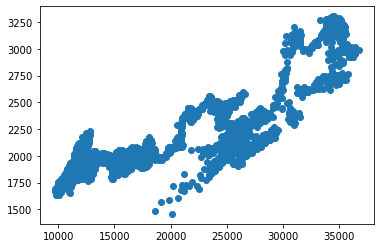

In [26]:
plt.scatter(df['DOW'], df['KOSPI'])

그래프를 좀 더 크게 그려봅시다.  
* plt.figure(figsize=(가로 길이, 세로 길이))

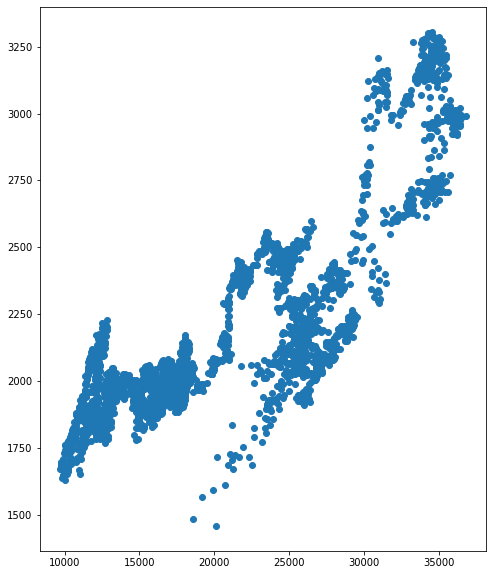

In [27]:
plt.figure(figsize=(8, 10))
plt.scatter(df['DOW'], df['KOSPI'])

x축에 레이블을, y축에 레이블을 넣어봅시다.  
* plt.xlabel('x축 레이블')  
* plt.ylabel('y축 레이블')

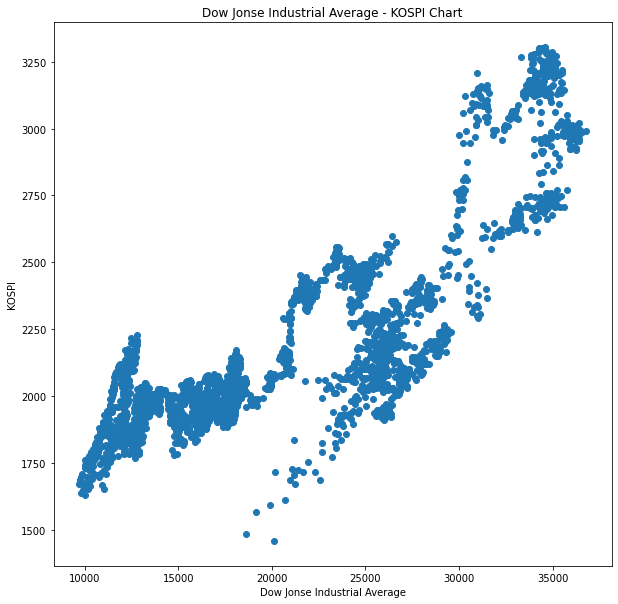

In [28]:
plt.figure(figsize=(10, 10))
plt.title('Dow Jonse Industrial Average - KOSPI Chart')
plt.xlabel('Dow Jonse Industrial Average')
plt.ylabel('KOSPI')
plt.scatter(df['DOW'], df['KOSPI'])

#선형 회귀 분석

예시를 들어봅시다.  
시험 공부하는 시간을 늘리면 늘릴 수록 성적이 잘 나옵니다. 하루에 걷는 횟수를 늘릴 수록, 몸무게는 줄어듭니다. 집의 평수가 클수록, 집의 매매 가격은 비쌉니다.

이는 수학적으로 생각을 해보면 어떤 요인의 수치에 따라서 특정 요인의 수치가 영향을 받고있다고 말할 수 있습니다.  
조금 더 수학적인 표현을 써보면 어떤 변수의 값에 따라서 특정 변수의 값이 영향을 받고 있다고 볼 수 있습니다. 다른 변수의 값을 변하게하는 변수를 `x`, 변수 x에 의해서 값이 종속적으로 변하는 변수 `y`라고 해봅시다.

이때 변수 x의 값은 독립적으로 변할 수 있는 것에 반해, y값은 계속해서 x의 값에 의해서, 종속적으로 결정되므로 x를 `독립 변수`, y를 `종속 변수`라고 합니다. `선형 회귀`는 한 개 이상의 독립 변수 x와 y의 선형 관계를 모델링합니다. 만약, 독립 변수 x가 1개라면 식은 다음과 같습니다.

$$y = wx + b$$

여기서 독립 변수 x와 곱해지는 값 `w`를 머신 러닝에서는 기울기, `b`를 b를 y절편이라고 합니다.  

주어진 데이터로부터 이 데이터를 가장 잘 표현하는 직선을 찾는다는 것은 결국 적절한 `w`

와 적절한 `b` 의 값을 찾는다는 의미와 동일합니다. 흩어져 보이는 여러 데이터들에서 추세선을 구한다고도 볼 수 있겠습니다. 다음은 흩어져있는 여러 데이터로부터 적절한 `w` 와 `b`를 찾은 뒤 y = wx + b의 직선을 그린 경우를 보여줍니다.

https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/600px-Linear_regression.svg.png

데이터를 반영한 적절한 직선을 찾고나면(`w` 값과 `b` 의 값을 결정하고나면), 그 후에는 임의의 값에 대해서도 예측이 가능합니다. 가령, 위의 그래프에서 입력 x의 값이 0.5991일 때 y의 값을 예측한다는 것은 그저

$$y = wx + b$$

위의 수식에 입력 x값을 넣어본다는 이야기와 같습니다.

##시험 기간 예시

1시간을 공부했을 때 21점  
2시간을 공부했을 때 41점  
3시간을 공부했을 때 61점  

이라면 이로부터 선형 회귀를 모델링하면  
$w$는 20  
$b$는 1  

$시험성적 = w시험공부시간 + b$가 됩니다.

다시 말해 차트로 그리면  

$y=20x + 1$의 직선 차트를 그리면 됩니다.

###사이파이를 이용한 선형 회귀

사이파이는 파이썬 기반 수학, 과학, 엔지니어링용 핵심 패키지 모음입니다. 사이파이는 넘파이 기반의 함수들과 수학적 알고리즘의 모음으로 넘파이, 맷플롯립, 심파이, 판다스 등을 포함합니다. 

In [1]:
# 사이파이 설치
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


사이파이 패키지의 서브 패키지인 스탯츠(stats)는 다양한 통계 함수를 제공합니다.  

lingress() 함수를 사용하면 시리즈 두 개만으로 간단히 선형 회귀 모델을 생성하여 분석할 수 있습니다.

* model = stats.linregress(독립 변수 x, 종속 변수 y)  
* model.slope : 기울기  
* model.intercept : y절편

In [4]:
from scipy import stats

In [29]:
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.04143297654588369, intercept=1324.4719528915227, rvalue=0.8341419341732609, pvalue=0.0, stderr=0.0004890626291200579)

In [30]:
# 기울기만 별도 출력
regr.slope

0.04143297654588369

In [ ]:
# Y 절편만 별도 출력
regr.intercept

1413.83668006584

* slope : 찾아낸 기울기  
* intercpet : 찾아낸 y절편  
* rvalue : r값 (상관계수)  
* pvalue : p값  
* stderr : 표준편차

위로부터 얻은 결과로부터 선형회귀 식을 구할 수 있습니다.  
기울기가 약 0.036, y절편이 1413이므로  

선형 회귀 수식은  

$$y = wx + b$$
에서 각각 w와 b를 대입하여  

$$y = 0.036x + 1413$$  
와 같습니다. 종속 변수 y가 코스피 지수, 독립 변수 x가 다우존스 지수였으므로  
$$코스피 지수 = 0.036 × 다우존스 지수 + 1413$$  

이 우리가 얻은 최종 선형 회귀 수식입니다. 이제 우리는 다우존스 지수로부터 다우 코스피 지수를 예측하는 식을 얻은 것입니다.

**!! 주의 : 위 값은 강의 영상을 녹화할 당시인 6월 28일까지의 데이터를 가지고 나온 값이므로 여러분들이 7월에 실습할 때는 7월까지의 데이터를 가지고 구하기 때문에 기울기와 y절편의 값이 제가 구했을 때와 다를 수 있습니다.**

#상관 계수에 따른 리스크 완화

##상관계수 구하기

**2강에서 배웠던 상관 계수에 대해서 복습해봅시다.**

상관계수(Coefficient of Correlation)란 독립 변수와 종속 변수 사이의 상관관계의 정도를 나타내는 수치입니다.  
상관계수 r은 항상 -1 <= r <= 1을 만족시킵니다. 양의 상관관계가 가장 강한 값을 1로, 음의 상관관계가 가장 강한 값을 -1로 나타내며,  
상관관계가 없다면 r은 0입니다.  

A자산과 B자산의 상관계수가 1이면, A자산 가치가 x% 상승할 때 B자산 가치도 x%만큼 상승합니다.  
A자산과 B자산의 상관계수가 -1이면, A자산 가치가 x%만큼 상승할 때, B자산 가치는 x%만큼 하락합니다. (반비례)  

A자산과 B자산의 상관계수가 0이면 두 자산의 움직임이 서로 연관성이 없습니다.

데이터프레임은 상관계수를 구하는 corr() 함수를 제공하므로 데이터프레임의 각 열의 상관계수를 쉽게 구할 수 있습니다.

In [31]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.834142
KOSPI,0.834142,1.000000


DOW 지수와 KOSPI 지수의 상관 계수는 0.834142입니다.

**!! 주의 : 위 값은 강의 영상을 녹화할 당시인 6월 28일까지의 데이터를 가지고 나온 값이므로 여러분들이 7월에 실습할 때는 7월까지의 데이터를 가지고 구하기 때문에 상관 계수의 값이 제가 구했을 때와 다를 수 있습니다.**

데이터프레임이 아닌 시리즈(series)를 기준으로 상관 계수를 구할 수 있습니다.

여기서 시리즈란 데이터프레임의 하나의 열을 의미합니다. 다시 말해 각각의 열을 콕집어서 상관계수를 구한다는 것이죠.

In [32]:
df['DOW'].corr(df['KOSPI'])

0.8341419341732611

당연하지만 결과는 동일하게 0.8341419341732611입니다.

결정 계수(R-squared)는 관측된 데이터에서 추정한 회귀선이 실제로 데이터를 어느 정도 설명하는지를 나타내는 계수로,  
두 변수의 상관관계 정도를 나타내는 상관 계수를 제곱한 값입니다.  

데이터프레임 corr() 함수의 결과는 테이블 형태이므로, 여기서는 제일 간편한 방식인 시리즈의 corr() 함수를 사용하여 상관계수를 구해봅시다.

In [33]:
r_value = df['DOW'].corr(df['KOSPI'])
r_value

0.8341419341732611

앞서 구했듯이 0.8341419341732611입니다.

In [34]:
r_squared = r_value ** 2
r_squared

0.695792766346309

결정 계수가 1이면 선형 회귀 모델이 완벽하게 데이터를 설명한다는 의미입니다. 또는, 선형 회귀 직선 위에 모든 데이터가 다 올라가있다는 의미이기도 합니다.  

반면에 결정 계수가 0이면 선형 회귀 모델. 즉, 직선이 전혀 변수 사이의 관계를 설명하지 못한다는 의미이기도 합니다.  

0.57이 나왔다는 것은 모델이 데이터를 어느정도 설명 가능하다는 것을 의미합니다.

이제 데이터와 선형 회귀 모델(직선)을 시각화해봅시다.

In [36]:
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

In [37]:
regr_line

'Y = 0.04 * X + 1324.47'

위에서 언급했듯이 Y는 코스피 지수, X는 다우존스 지수입니다.

In [38]:
type(regr_line)

str

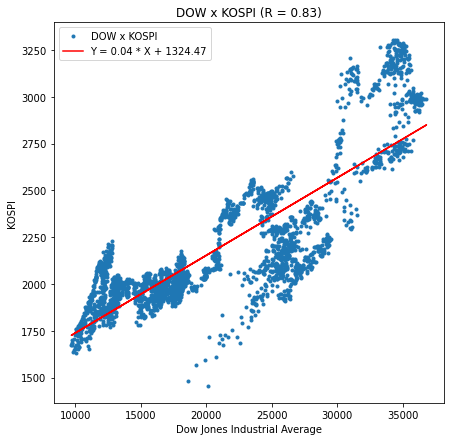

In [39]:
plt.figure(figsize=(7,7))
plt.plot(df['DOW'], df['KOSPI'], '.')
plt.plot(df['DOW'], regr.slope * df['DOW'] + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

##리스크 완화

노벨경제학상을 수상한 해리 마코위츠 박사가 체계화한 현대 포트폴리오 이론은 **'투자에 대한 수익과 위험은 평균과 분산으로 나타낼 수 있으며, 상관관계가 낮은 자산을 대상으로 분산 투자하면 위험을 감소시킬 수 있다'**는 이론입니다.

상관관계가 낮은 대표적인 예로 주식과 채권을 들 수 있는데,  
이처럼 상관관계가 낮은 자산으로 포트폴리오를 구성하면 약세장과 강세장에서 모두 실적을 낼 수 있습니다.

두 개의 투자 대상의 상관 계수가 다음과 같다면 리스크 완화 효과는 다음과 같습니다.

상관 계수 : +1.0 -> 리스크 완화 효과가 없음  
상관 계수 : +0.5 -> 중간 정도의 리스크 완화 효과가 있음  
상관 계수 : 0 -> 상당한 리스크 완화 효과가 있음  
상관 계수 : -0.5 -> 대부분의 리스크를 제거함  
상관 계수 : -1.0 -> 모든 리스크를 제거함.

실제로 파이썬에서 상관관계가 어떻게 표시되는지 확인해봅시다.  
먼저 시리즈 세 개를 생성한 뒤에 이를 이용하여 데이터프레임을 생성합니다.

In [40]:
import pandas as pd

임의로 정수로 시리즈를 생성합니다. 2번 시리즈는 1번 시리즈와 변동 비율과 부호가 같지만, 값은 다릅니다.  
3번 시리즈는 1번 시리즈와 절대값은 같지만, 부호가 다릅니다.

In [41]:
s1 = pd.Series([+10, -20, +30, -40, +50])
s2 = pd.Series([+1, -2, +3, -4, +5])
s3 = pd.Series([-10, +20, -30, +40, -50])

In [42]:
df = pd.DataFrame({'S1' : s1, 'S2' : s2, 'S3' : s3})

In [43]:
df

,S1,S2,S3
0,10,1,-10
1,-20,-2,20
2,30,3,-30
3,-40,-4,40
4,50,5,-50


데이터프레임에서 제공하는 corr() 함수를 사용하여 각 시리즈 간의 상관관계를 확인해봅시다.  
s1과 s2처럼 변동 비율이 같고 부호가 같을 경우 상관관계가 1로 표시됩니다.  

s1과 s3 또는 s2와 s3처럼 변동 비율이 같지만 부호가 반대일 경우 상관관계가 -1로 표시됩니다.

In [44]:
df.corr()

,S1,S2,S3
S1,1.0,1.0,-1.0
S2,1.0,1.0,-1.0
S3,-1.0,-1.0,1.0


**핵심 요약**

* 판다스에서 제공하는 시리즈는 인덱스를 지니는 1차원 벡터이고, 데이터프레임은 인덱스를 지니는 테이블 형태 자료형입니다. 시리즈는 데이터프레임의 하나의 칼럼에 해당됩니다.  
* 판다스를 이용하면 2차원 테이블 형태의 데이터프레임을 다룰 수 있습니다.  
* 회귀 분석은 데이터의 상관관계를 분석하는데 많이 쓰이는 통계 분석 방법입니다. 회귀식을 구한 뒤 임의의 독립변수에 대해서 종속변수의 값을 추측해볼 수 있는데, 이를 예측이라고 합니다.  
* 오늘의 종가를 특정일의 종가로 나눈 뒤 100을 곱하면, 특정일의 종가 대비 오늘의 변동률을 구할 수 있습니다. 이렇게 가격이 다른 두 주식 종목의 수익률를 비교하는 방법을 **지수화**라고 합니다.  
* 상관계수란 독립변수와 종속변수 사이의 상관관계의 정도를 나타내는 수치입니다. 양의 상관관계가 가장 강한 값을 1로, 음의 상관관계가 가장 강한 값을 -1로 나타내며, 상관관계가 없을 때 0입니다.  
* 상관계수는 시리즈나 데이터프레임에서 corr() 함수를 호출해서 구할 수 있고, 사이파이의 서브 패키지인 스탯츠로 선형회귀 모델을 생성하여 구할 수도 있습니다.  
* 현대 포트폴리오 이론의 성과 중 하나는 주식과 채권처럼 상관관계가 낮은 자산으로 포트폴리오를 구성함으로써, 포트폴리오의 전반적인 위험을 줄일 수 있다는 것을 알려주었다는 점입니다.

# Quiz

## Quiz #1

상관 분석은 5강에서 처음 배운 것이 아닙니다. 2강에서 상관 계수를 구하고 히트맵으로 시각화 하는 방법에 대해서 배웠습니다.  

2010년 6월 1일부터 현재까지의 코스피 지수와 다우 존스 지수의 상관 계수를 구하고, 이를 히트맵으로 시각화하세요.

In [46]:
import FinanceDataReader as fdr

dow = fdr.DataReader('DJI', '2010-06-01')
kos = fdr.DataReader('KS11','2010-06-01')

In [47]:
dow.describe()

,Close,Open,High,Low,Volume,Change
count,3046.000000,3046.000000,3046.000000,3046.000000,3.046000e+03,3046.000000
mean,20641.172131,20637.239773,20748.173802,20520.439554,2.287815e+08,0.000426
std,7219.498081,7221.809393,7261.858811,7176.872581,1.377907e+08,0.010816
min,9686.480000,9689.210000,9770.870000,9614.320000,3.364000e+07,-0.129300
25%,14990.220000,14989.720000,15070.705000,14924.250000,1.114400e+08,-0.003600
50%,18115.940000,18108.570000,18176.285000,18038.750000,2.008100e+08,0.000600
75%,25970.127500,25988.770000,26108.210000,25814.115000,3.205925e+08,0.005300
max,36799.650000,36722.600000,36952.650000,36636.000000,9.226800e+08,0.113700


In [48]:
kos.describe()

,Close,Open,High,Low,Volume,Change
count,2987.000000,2987.000000,2987.000000,2987.000000,2.987000e+03,2987.000000
mean,2178.940790,2180.117533,2190.328262,2166.920512,4.944717e+08,0.000173
std,359.418676,359.740700,361.869183,357.377572,2.968954e+08,0.010410
min,1457.640000,1474.450000,1516.750000,1439.430000,1.722300e+05,-0.083900
25%,1958.105000,1960.325000,1966.660000,1949.390000,3.156450e+08,-0.004700
50%,2043.970000,2046.670000,2053.460000,2036.230000,3.972500e+08,0.000400
75%,2308.270000,2312.200000,2320.525000,2296.055000,5.615600e+08,0.005700
max,3305.210000,3305.460000,3316.080000,3295.440000,3.460000e+09,0.086000


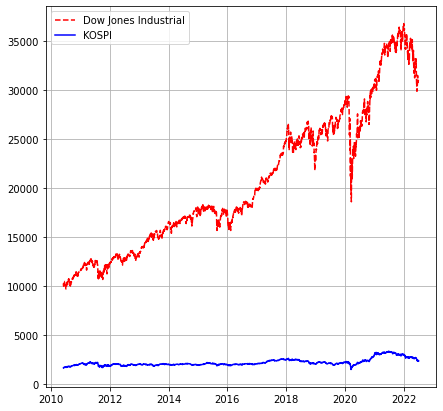

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kos.index, kos.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [53]:
df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI' : kospi['Close']})
df

,DOW,KOSPI
Date,,
2010-06-01,10024.02,1630.40
2010-06-02,10249.54,NaN
2010-06-03,10255.28,1661.84
2010-06-04,9931.97,1664.13
2010-06-07,9816.49,1637.97
...,...,...
2022-07-01,31097.46,2305.42
2022-07-04,NaN,2300.34
2022-07-05,30967.45,2341.78


In [57]:
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
df

,DOW,KOSPI
Date,,
2010-06-01,10024.02,1630.40
2010-06-02,10249.54,1661.84
2010-06-03,10255.28,1661.84
2010-06-04,9931.97,1664.13
2010-06-07,9816.49,1637.97
...,...,...
2022-07-01,31097.46,2305.42
2022-07-04,30967.45,2300.34
2022-07-05,30967.45,2341.78


In [63]:
corr = df.corr()

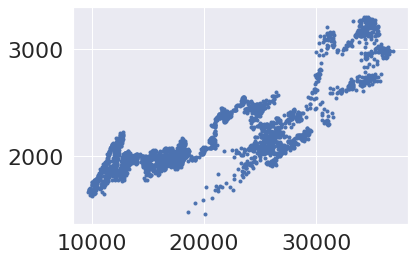

In [64]:
plt.plot(df['DOW'],df['KOSPI'],'.')

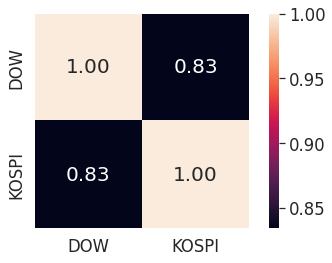

In [68]:
import seaborn as sns
sns.set(font_scale=1.5)
column_names = ['DOW','KOSPI']

heatmap = sns.heatmap(corr.values, # 데이터
                          cbar = True, # 오른쪽 컬러 막대 출력 여부
                           annot = True, # 차트에 숫자를 보여줄 것인지 여부
                          annot_kws={'size' : 20}, # 숫자 출력 시 숫자 크기 조절
                           fmt = '.2f', # 숫자의 출력 소수점자리 개수 조절
                           square = 'True', # 차트를 정사각형으로 할 것인지
                          yticklabels=column_names, # y축에 컬럼명 출력
                          xticklabels=column_names) # x축에 컬럼명 출력
plt.tight_layout()
plt.show()

## Quiz #1 풀이

In [ ]:
import pandas as pd # 판다스 임포트.
import matplotlib.pyplot as plt # 맷플롯립 임포트.
import seaborn as sns # 시본 임포트
import FinanceDataReader as fdr

In [ ]:
dow = fdr.DataReader('DJI', '2010-06-01')
dow.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-06-01,10024.02,10133.94,10249.27,9976.56,221900000.0,-0.0111
2010-06-02,10249.54,10025.61,10256.57,10007.09,200850000.0,0.0225
2010-06-03,10255.28,10250.67,10348.84,10158.92,176870000.0,0.0006
2010-06-04,9931.97,10249.61,10249.61,9881.11,256600000.0,-0.0315
2010-06-07,9816.49,9931.75,10025.84,9798.73,222940000.0,-0.0116


In [ ]:
kospi = fdr.DataReader('KS11', '2010-06-01')
kospi.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2010-06-01,1630.40,1634.55,1643.08,1623.40,314100000.0,-0.0066
2010-06-03,1661.84,1643.74,1663.67,1641.77,308760000.0,0.0193
2010-06-04,1664.13,1660.99,1670.94,1658.52,286090000.0,0.0014
2010-06-07,1637.97,1628.06,1638.88,1618.57,300880000.0,-0.0157
2010-06-08,1651.48,1635.01,1656.37,1630.43,280290000.0,0.0082


In [ ]:
df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI' : kospi['Close']})
df

,DOW,KOSPI
Date,,
2010-06-01,10024.02,1630.40
2010-06-02,10249.54,NaN
2010-06-03,10255.28,1661.84
2010-06-04,9931.97,1664.13
2010-06-07,9816.49,1637.97
...,...,...
2021-07-01,34633.53,3282.06
2021-07-02,34786.35,3281.78
2021-07-05,NaN,3293.21


In [ ]:
df.isnull().sum()

DOW       85
KOSPI    138
dtype: int64

In [ ]:
df = df.fillna(method='bfill')
df

,DOW,KOSPI
Date,,
2010-06-01,10024.02,1630.40
2010-06-02,10249.54,1661.84
2010-06-03,10255.28,1661.84
2010-06-04,9931.97,1664.13
2010-06-07,9816.49,1637.97
...,...,...
2021-07-01,34633.53,3282.06
2021-07-02,34786.35,3281.78
2021-07-05,34577.37,3293.21


In [ ]:
# 앞의 값으로 채운다
df = df.fillna(method='ffill')
df

,DOW,KOSPI
Date,,
2010-06-01,10024.02,1630.40
2010-06-02,10249.54,1661.84
2010-06-03,10255.28,1661.84
2010-06-04,9931.97,1664.13
2010-06-07,9816.49,1637.97
...,...,...
2021-07-01,34633.53,3282.06
2021-07-02,34786.35,3281.78
2021-07-05,34577.37,3293.21


In [ ]:
corr = df.corr()

In [ ]:
corr

,DOW,KOSPI
DOW,1.00000,0.76376
KOSPI,0.76376,1.00000


In [ ]:
corr.values

array([[1.       , 0.7637595],
       [0.7637595, 1.       ]])

In [ ]:
column_names = ['DOW', 'KOSPI']

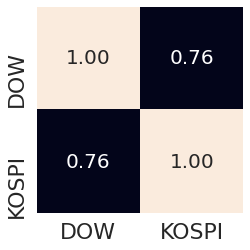

In [ ]:
# 레이블의 폰트 사이즈를 조정
sns.set(font_scale=2.0)

test_heatmap = sns.heatmap(corr.values, # 데이터
                          cbar = False, # 오른쪽 컬러 막대 출력 여부
                           annot = True, # 차트에 숫자를 보여줄 것인지 여부
                          annot_kws={'size' : 20}, # 숫자 출력 시 숫자 크기 조절
                           fmt = '.2f', # 숫자의 출력 소수점자리 개수 조절
                           square = 'True', # 차트를 정사각형으로 할 것인지
                          yticklabels=column_names, # y축에 컬럼명 출력
                          xticklabels=column_names) # x축에 컬럼명 출력
plt.tight_layout()
plt.show()

##Quiz #2

2강에서 상관관계를 위한 시각화로 seaborn의 pairplot()을 배웠습니다.  
다우존스 지수와 코스피 지수로 pairplot()을 사용하여 산점도를 시각화하세요.

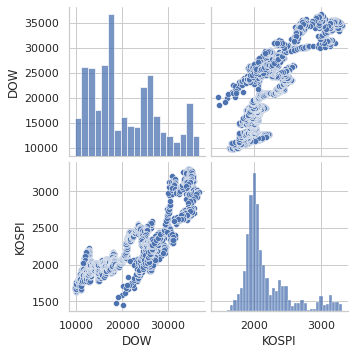

In [71]:
sns.set(style='whitegrid')
sns.pairplot(df)
plt.show()

## Quiz #2 풀이

해당 풀이는 Quiz #1에서 얻은 데이터프레임을 가지고 수행한다는 가정 하에서 작성된 코드임.

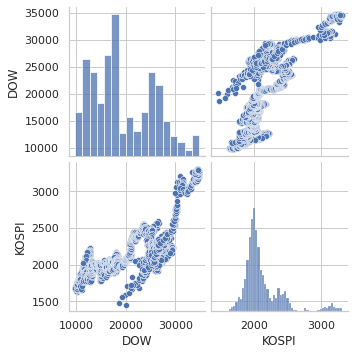

In [ ]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid')
sns.pairplot(df)
plt.show()

## Quiz #3

수업에서는 다우존스 지수로부터 코스피 지수를 예측했습니다. 반대로 사이파이 패키지를 사용하여 코스피 지수로부터 다우존스 지수를 예측하는 선형 회귀 모델을 학습하고 기울기(slope)와 Y절편(intercept)의 값을 얻으세요.

In [78]:
from scipy import stats

regr = stats.linregress(df['KOSPI'],df['DOW'])
# print(regr)
print("기울기 : ",regr.slope)
print("상수 : ",regr.intercept)


기울기 :  16.79321217909059
상수 :  -15960.44306979972


## Quiz #3 풀이

해당 풀이는 Quiz #1에서 얻은 데이터프레임을 가지고 수행한다는 가정 하에서 작성된 코드임.  
실행 시점에 따라서 기울기와 Y절편은 강사가 얻은 값과 다소 다를 수 있음.

In [ ]:
from scipy import stats

In [ ]:
regr = stats.linregress(df['KOSPI'], df['DOW'])
regr

LinregressResult(slope=15.850132999580802, intercept=-14162.233877918618, rvalue=0.7637595010437794, pvalue=0.0, stderr=0.2497486864326557)

In [ ]:
# 기울기만 별도 출력
regr.slope

15.850132999580802

In [ ]:
# Y 절편만 별도 출력
regr.intercept

-14162.233877918618